In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Loan prediction problem from Analytics vidya

In [4]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [5]:
# Importing all datasets
Loan_data = pd.read_csv("train_ctrUa4K (1).csv")
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(Loan_data, title = 'EDA_Loan_Data', explorative=True)

In [8]:
profile.to_widgets()

## Pandas profiling did not provide much information let us get our hands dirty and do it in a data science way

In [9]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# Let's see the type of each column
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# List of variables to map

varlist =  ['Married', 'Self_Employed']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function t
Loan_data[varlist] = Loan_data[varlist].apply(binary_map)

In [12]:
# List of variables to map

target =  ['Loan_Status']

# Defining the map function
def map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function 
Loan_data[target] = Loan_data[target].apply(map)

In [13]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [14]:
# Creating dummy variables 
g = pd.get_dummies(Loan_data['Gender'])



In [15]:
#Adding the results to the master dataframe
Loan_data = pd.concat([Loan_data,g], axis=1)

In [16]:
e = pd.get_dummies(Loan_data['Education'])
p = pd.get_dummies(Loan_data['Property_Area'])
d = pd.get_dummies(Loan_data['Dependents'])



In [17]:
Loan_data = pd.concat([Loan_data,e], axis=1)
Loan_data = pd.concat([Loan_data,p], axis=1)
Loan_data = pd.concat([Loan_data,d], axis=1)

In [18]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
0,LP001002,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,...,1,1,0,0,0,1,1,0,0,0
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,...,1,1,0,1,0,0,0,1,0,0
2,LP001005,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,...,1,1,0,0,0,1,1,0,0,0
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,...,1,0,1,0,0,1,1,0,0,0
4,LP001008,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,...,1,1,0,0,0,1,1,0,0,0


In [19]:
# We have created dummies for the below variables, so we can drop them
Loan_data = Loan_data.drop(['Gender','Education','Property_Area','Dependents'], 1)

In [20]:
Loan_data.head()

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
0,LP001002,0.0,0.0,5849,0.0,NaN,360.0,1.0,1,0,1,1,0,0,0,1,1,0,0,0
1,LP001003,1.0,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,0,0,1,0,0
2,LP001005,1.0,1.0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1,1,0,0,0
3,LP001006,1.0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1,1,0,0,0
4,LP001008,0.0,0.0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1,1,0,0,0


In [21]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Married            611 non-null    float64
 2   Self_Employed      582 non-null    float64
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         592 non-null    float64
 6   Loan_Amount_Term   600 non-null    float64
 7   Credit_History     564 non-null    float64
 8   Loan_Status        614 non-null    int64  
 9   Female             614 non-null    uint8  
 10  Male               614 non-null    uint8  
 11  Graduate           614 non-null    uint8  
 12  Not Graduate       614 non-null    uint8  
 13  Rural              614 non-null    uint8  
 14  Semiurban          614 non-null    uint8  
 15  Urban              614 non-null    uint8  
 16  0                  614 non

In [22]:
# Checking for outliers in the continuous variables
num_Loan = Loan_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Loan.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
90%,9459.900000,3782.200000,235.800000,360.00000
95%,14583.000000,4997.400000,297.800000,360.00000
99%,32540.410000,8895.890000,496.360000,480.00000


In [24]:
Loan_data.isnull().sum()

Loan_ID               0
Married               3
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
Female                0
Male                  0
Graduate              0
Not Graduate          0
Rural                 0
Semiurban             0
Urban                 0
0                     0
1                     0
2                     0
3+                    0
dtype: int64

In [25]:
# Checking the percentage of missing values
round(100*(Loan_data.isnull().sum()/len(Loan_data.index)), 2)

Loan_ID              0.00
Married              0.49
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Loan_Status          0.00
Female               0.00
Male                 0.00
Graduate             0.00
Not Graduate         0.00
Rural                0.00
Semiurban            0.00
Urban                0.00
0                    0.00
1                    0.00
2                    0.00
3+                   0.00
dtype: float64

In [26]:
Loan_data.head()

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
0,LP001002,0.0,0.0,5849,0.0,NaN,360.0,1.0,1,0,1,1,0,0,0,1,1,0,0,0
1,LP001003,1.0,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,0,0,1,0,0
2,LP001005,1.0,1.0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1,1,0,0,0
3,LP001006,1.0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1,1,0,0,0
4,LP001008,0.0,0.0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1,1,0,0,0


In [27]:
new_data = Loan_data.copy()

In [28]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

In [29]:
cols = ['Married', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in cols:
    print('Imputation with Median: %s' % (col))
    new_data[col].fillna(new_data[col].median(), inplace=True)
    new_data[col].fillna(new_data[col].median(), inplace=True)

Imputation with Median: Married
Imputation with Median: Self_Employed
Imputation with Median: LoanAmount
Imputation with Median: Loan_Amount_Term
Imputation with Median: Credit_History


In [30]:
# Checking the percentage of missing values
round(100*(new_data.isnull().sum()/len(new_data.index)), 2)

Loan_ID              0.0
Married              0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Loan_Status          0.0
Female               0.0
Male                 0.0
Graduate             0.0
Not Graduate         0.0
Rural                0.0
Semiurban            0.0
Urban                0.0
0                    0.0
1                    0.0
2                    0.0
3+                   0.0
dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Putting feature variable to X
X = new_data.drop(['Loan_Status','Loan_ID'], axis=1)

X.head()

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,0,1,1,0,0,0
1,1.0,0.0,4583,1508.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,0
2,1.0,1.0,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,0,1,1,0,0,0
3,1.0,0.0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,0,1,1,0,0,0
4,0.0,0.0,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,0,1,1,0,0,0


In [33]:
# Putting response variable to y
y = new_data['Loan_Status']

y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.fit_transform(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

X_train.head()

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
51,0.0,0.0,-0.393772,-0.747111,-0.301971,0.281228,1.0,1,0,1,0,0,1,0,1,0,0,0
231,1.0,0.0,-0.284731,-0.747111,-1.276184,-2.469082,1.0,0,1,1,0,1,0,0,1,0,0,0
545,1.0,0.0,-0.448812,0.256389,0.135176,0.281228,1.0,0,1,1,0,1,0,0,1,0,0,0
354,1.0,0.0,-0.508525,-0.487230,-0.177071,0.281228,1.0,1,0,1,0,0,1,0,1,0,0,0
312,0.0,0.0,-0.493987,-0.747111,-1.101325,0.281228,1.0,1,0,1,0,1,0,0,1,0,0,0


In [37]:
### Checking the default Rate
Loan_Status = (sum(Loan_data['Loan_Status'])/len(Loan_data['Loan_Status'].index))*100
Loan_Status

68.72964169381108

In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

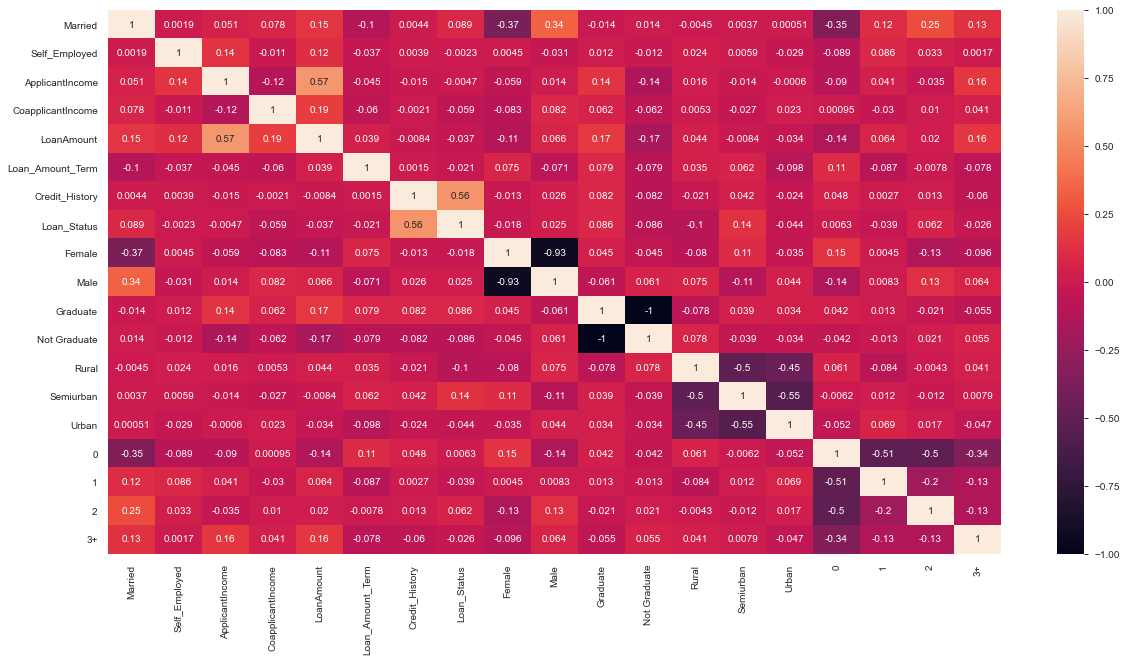

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Loan_data.corr(),annot = True)
plt.show()

In [40]:
import statsmodels.api as sm

In [41]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                            GLM   Df Residuals:                      412
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -181.78
Date:                Sat, 13 Jun 2020   Deviance:                       363.57
Time:                        21:40:03   Pearson chi2:                     414.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1067      0.780     -2.701      0.007      -3.636      -0.578
Married               0.7122      0.324      2.199      0.028       0.077       1.347
Self_Employed        -0.0171      0.375     -0.046      0.964      -0.752       0.718
ApplicantIncome      -0.0868      0.192     -0.453      0.651      -0.462       0.289
CoapplicantIncome    -0.1475      0.137     -1.078      0.281      -0.416       0.121
LoanAmount           -0.2441      0.152     -1.608      0.108      -0.542       0.053
Loan_Amount_Term      0.0857      0.135      0.636      0.525      -0.178       0.350
Credit_History        4.2553      0.560      7.605      0.000       3.159       5.352
Female                0.7685      0.891      0.863      0.388      -0.978       2.515
Male                  0.7155      0.833      0.859      0.390      -0.916       2.347
Graduate             -0.7749      0.408     -1.901      0.057      -1.574       0.024
Not Graduate         -1.3318      0.439     -3.035      0.002      -2.192      -0.472
Rural                -0.9574      0.327     -2.931      0.003      -1.598      -0.317
Semiurban            -0.1067      0.323     -0.331      0.741      -0.739       0.526
Urban                -1.0426      0.321     -3.252      0.001      -1.671      -0.414
0                    -0.2120      1.027     -0.206      0.836      -2.224       1.800
1                    -0.8247      1.041     -0.792      0.428      -2.865       1.215
2                     0.1937      1.067      0.182      0.856      -1.898       2.285
3+                   -0.0509      1.133     -0.045      0.964      -2.272       2.170
=====================================================================================
"""

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [44]:
rfe.support_

array([ True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False])

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Married', True, 1),
 ('Self_Employed', False, 6),
 ('ApplicantIncome', False, 2),
 ('CoapplicantIncome', True, 1),
 ('LoanAmount', True, 1),
 ('Loan_Amount_Term', False, 3),
 ('Credit_History', True, 1),
 ('Female', True, 1),
 ('Male', True, 1),
 ('Graduate', True, 1),
 ('Not Graduate', True, 1),
 ('Rural', True, 1),
 ('Semiurban', True, 1),
 ('Urban', True, 1),
 ('0', False, 5),
 ('1', True, 1),
 ('2', True, 1),
 ('3+', False, 4)]

In [46]:
col = X_train.columns[rfe.support_]

In [47]:
X_train.columns[~rfe.support_]

Index(['Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term', '0', '3+'], dtype='object')

In [48]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                            GLM   Df Residuals:                      417
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.12
Date:                Sat, 13 Jun 2020   Deviance:                       364.24
Time:                        21:40:04   Pearson chi2:                     415.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1811      0.536     -4.067      0.000      -3.232      -1.130
Married               0.7325      0.314      2.331      0.020       0.116       1.348
CoapplicantIncome    -0.1338      0.129     -1.039      0.299      -0.386       0.119
LoanAmount           -0.2719      0.123     -2.218      0.027      -0.512      -0.032
Credit_History        4.2219      0.554      7.616      0.000       3.135       5.309
Female                0.7522      0.880      0.855      0.393      -0.972       2.477
Male                  0.6822      0.822      0.830      0.406      -0.928       2.293
Graduate             -0.8094      0.289     -2.798      0.005      -1.376      -0.242
Not Graduate         -1.3717      0.336     -4.083      0.000      -2.030      -0.713
Rural                -0.9772      0.258     -3.789      0.000      -1.483      -0.472
Semiurban            -0.1297      0.257     -0.505      0.614      -0.633       0.374
Urban                -1.0742      0.270     -3.981      0.000      -1.603      -0.545
1                    -0.6621      0.347     -1.910      0.056      -1.341       0.017
2                     0.3622      0.418      0.867      0.386      -0.457       1.181
=====================================================================================
"""

In [49]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

51     0.884524
231    0.892428
545    0.831703
354    0.937011
312    0.803102
104    0.827243
277    0.858183
592    0.668120
120    0.812063
420    0.856900
dtype: float64

In [50]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88452383, 0.89242771, 0.83170323, 0.93701074, 0.80310205,
       0.82724323, 0.85818302, 0.66811985, 0.81206256, 0.85690006])

In [51]:
y_train_pred_final = pd.DataFrame({'Loan_Status':y_train.values, 'Loan_def_Prob':y_train_pred})
y_train_pred_final['Loan_ID'] = y_train.index
y_train_pred_final.head()

,Loan_Status,Loan_def_Prob,Loan_ID
0,1,0.884524,51
1,1,0.892428,231
2,1,0.831703,545
3,1,0.937011,354
4,1,0.803102,312


In [52]:
y_train_pred_final['predicted'] = y_train_pred_final.Loan_def_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Loan_Status,Loan_def_Prob,Loan_ID,predicted
0,1,0.884524,51,1
1,1,0.892428,231,1
2,1,0.831703,545,1
3,1,0.937011,354,1
4,1,0.803102,312,1


In [53]:
from sklearn import metrics

In [54]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Loan_Status, y_train_pred_final.predicted )
print(confusion)

[[ 60  69]
 [  6 294]]


In [55]:
# Predicted     not_def    def
# Actual
# not_def       60      69
# def            6       294  

In [56]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Loan_Status, y_train_pred_final.predicted))

0.8251748251748252


In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Graduate,inf
7,Not Graduate,inf
8,Rural,inf
9,Semiurban,inf
10,Urban,inf
4,Female,8.01
5,Male,7.81
0,Married,1.34
12,2,1.16
1,CoapplicantIncome,1.11


In [59]:
col = col.drop('Not Graduate', 1)
col

Index(['Married', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Female', 'Male', 'Graduate', 'Rural', 'Semiurban', 'Urban', '1', '2'],
      dtype='object')

In [60]:
col = col.drop('Rural',1)

In [61]:
col

Index(['Married', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Female', 'Male', 'Graduate', 'Semiurban', 'Urban', '1', '2'],
      dtype='object')

In [62]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                            GLM   Df Residuals:                      417
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.12
Date:                Sat, 13 Jun 2020   Deviance:                       364.24
Time:                        21:40:05   Pearson chi2:                     415.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.5301      1.034     -4.380      0.000      -6.557      -2.503
Married               0.7325      0.314      2.331      0.020       0.116       1.348
CoapplicantIncome    -0.1338      0.129     -1.039      0.299      -0.386       0.119
LoanAmount           -0.2719      0.123     -2.218      0.027      -0.512      -0.032
Credit_History        4.2219      0.554      7.616      0.000       3.135       5.308
Female                0.7522      0.880      0.855      0.393      -0.972       2.477
Male                  0.6822      0.822      0.830      0.406      -0.928       2.293
Graduate              0.5623      0.325      1.731      0.083      -0.074       1.199
Semiurban             0.8475      0.340      2.492      0.013       0.181       1.514
Urban                -0.0969      0.320     -0.303      0.762      -0.724       0.530
1                    -0.6621      0.347     -1.910      0.056      -1.341       0.017
2                     0.3622      0.418      0.867      0.386      -0.457       1.181
=====================================================================================
"""

In [63]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [64]:
y_train_pred[:10]

array([0.88452383, 0.89242771, 0.83170323, 0.93701074, 0.80310205,
       0.82724323, 0.85818302, 0.66811985, 0.81206256, 0.85690006])

In [65]:
y_train_pred_final['Loan_def_Prob'] = y_train_pred

In [66]:
# Creating new column 'predicted' with 1 if Loan_def_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Loan_def_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Loan_Status,Loan_def_Prob,Loan_ID,predicted
0,1,0.884524,51,1
1,1,0.892428,231,1
2,1,0.831703,545,1
3,1,0.937011,354,1
4,1,0.803102,312,1


In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Loan_Status, y_train_pred_final.predicted))

0.8251748251748252


In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Male,9.50
3,Credit_History,6.76
6,Graduate,4.67
0,Married,3.70
4,Female,2.86
7,Semiurban,2.37
8,Urban,2.13
10,2,1.41
9,1,1.32
1,CoapplicantIncome,1.11


In [69]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Male')
col

Index(['Married', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Female', 'Graduate', 'Semiurban', 'Urban', '1', '2'],
      dtype='object')

In [70]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                            GLM   Df Residuals:                      418
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.45
Date:                Sat, 13 Jun 2020   Deviance:                       364.90
Time:                        21:40:06   Pearson chi2:                     415.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.8777      0.662     -5.857      0.000      -5.175      -2.580
Married               0.7325      0.314      2.331      0.020       0.117       1.348
CoapplicantIncome    -0.1307      0.129     -1.014      0.310      -0.383       0.122
LoanAmount           -0.2770      0.123     -2.258      0.024      -0.517      -0.037
Credit_History        4.2359      0.556      7.624      0.000       3.147       5.325
Female                0.0908      0.380      0.239      0.811      -0.654       0.836
Graduate              0.5450      0.324      1.684      0.092      -0.089       1.179
Semiurban             0.8437      0.340      2.485      0.013       0.178       1.509
Urban                -0.0840      0.319     -0.263      0.793      -0.710       0.542
1                    -0.6401      0.345     -1.855      0.064      -1.316       0.036
2                     0.3723      0.416      0.896      0.370      -0.442       1.187
=====================================================================================
"""

In [71]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [72]:
y_train_pred[:10]

array([0.88275802, 0.88960382, 0.82701535, 0.93599892, 0.80163826,
       0.82401779, 0.85617156, 0.79133789, 0.80688701, 0.85253017])

In [73]:
y_train_pred_final['Loan_def_Prob'] = y_train_pred

In [74]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Loan_def_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Loan_Status,Loan_def_Prob,Loan_ID,predicted
0,1,0.882758,51,1
1,1,0.889604,231,1
2,1,0.827015,545,1
3,1,0.935999,354,1
4,1,0.801638,312,1


In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Loan_Status, y_train_pred_final.predicted))

0.8251748251748252


In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Credit_History,4.84
5,Graduate,4.04
0,Married,3.29
6,Semiurban,2.25
7,Urban,1.95
4,Female,1.42
9,2,1.40
8,1,1.31
1,CoapplicantIncome,1.11
2,LoanAmount,1.10


In [77]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Loan_Status, y_train_pred_final.predicted )
confusion

array([[ 60,  69],
       [  6, 294]], dtype=int64)

In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Loan_Status, y_train_pred_final.predicted)

0.8251748251748252

In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.98

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.46511627906976744

In [82]:
# Calculate false postive rate - predicting def when customer does not have default
print(FP/ float(TN+FP))

0.5348837209302325


In [83]:
# positive predictive value 
print (TP / float(TP+FP))

0.8099173553719008


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9090909090909091


In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Loan_Status, y_train_pred_final.Loan_def_Prob, drop_intermediate = False )

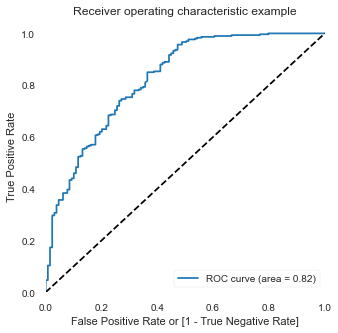

In [87]:
draw_roc(y_train_pred_final.Loan_Status, y_train_pred_final.Loan_def_Prob)

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Loan_def_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Loan_Status,Loan_def_Prob,Loan_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.882758,51,1,1,1,1,1,1,1,1,1,1,0
1,1,0.889604,231,1,1,1,1,1,1,1,1,1,1,0
2,1,0.827015,545,1,1,1,1,1,1,1,1,1,1,0
3,1,0.935999,354,1,1,1,1,1,1,1,1,1,1,1
4,1,0.801638,312,1,1,1,1,1,1,1,1,1,1,0


In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Loan_Status, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.699301  1.000000  0.000000
0.1   0.1  0.808858  0.990000  0.387597
0.2   0.2  0.815851  0.986667  0.418605
0.3   0.3  0.822844  0.986667  0.441860
0.4   0.4  0.820513  0.983333  0.441860
0.5   0.5  0.825175  0.980000  0.465116
0.6   0.6  0.825175  0.956667  0.519380
0.7   0.7  0.776224  0.856667  0.589147
0.8   0.8  0.680653  0.630000  0.798450
0.9   0.9  0.454545  0.230000  0.976744


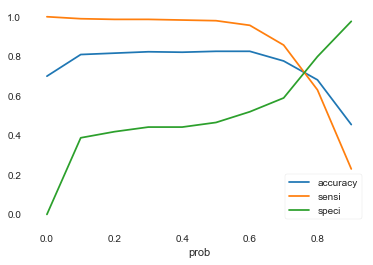

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [91]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Loan_def_Prob.map( lambda x: 1 if x > 0.7 else 0)

y_train_pred_final.head()

,Loan_Status,Loan_def_Prob,Loan_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.882758,51,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.889604,231,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.827015,545,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.935999,354,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.801638,312,1,1,1,1,1,1,1,1,1,1,0,1


In [92]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted)

0.7762237762237763

In [93]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted )
confusion2

array([[ 76,  53],
       [ 43, 257]], dtype=int64)

In [94]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8566666666666667

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.5891472868217055

In [97]:
# Calculate false postive rate - 
print(FP/ float(TN+FP))

0.4108527131782946


In [98]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8290322580645161


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6386554621848739


In [100]:
from sklearn.metrics import precision_score, recall_score

In [101]:
precision_score(y_train_pred_final.Loan_Status, y_train_pred_final.predicted)

0.8099173553719008

In [102]:
recall_score(y_train_pred_final.Loan_Status, y_train_pred_final.predicted)

0.98

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
y_train_pred_final.Loan_Status, y_train_pred_final.predicted

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 424    1
 425    0
 426    1
 427    1
 428    1
 Name: Loan_Status, Length: 429, dtype: int64,
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 424    1
 425    1
 426    1
 427    1
 428    1
 Name: predicted, Length: 429, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Loan_Status, y_train_pred_final.Loan_def_Prob)

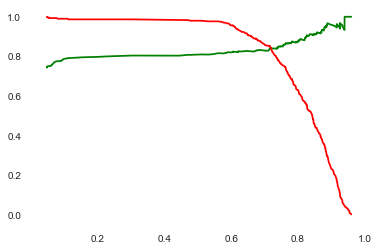

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [107]:
X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']] = scaler.transform(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']])

In [108]:
X_test = X_test[col]
X_test.head()

,Married,CoapplicantIncome,LoanAmount,Credit_History,Female,Graduate,Semiurban,Urban,1,2
253,1.0,2.907172,1.683926,1.0,0,0,1,0,1,0
506,1.0,2.683829,4.194398,1.0,0,1,0,1,0,0
365,0.0,-0.747111,-0.139602,1.0,0,0,0,0,0,0
265,0.0,1.026768,0.085217,1.0,0,1,0,0,0,0
260,1.0,1.440004,2.320911,1.0,0,1,0,1,1,0


In [109]:
X_test_sm = sm.add_constant(X_test)

In [110]:
y_test_pred = res.predict(X_test_sm)

In [111]:
y_test_pred[:10]

253    0.610113
506    0.509764
365    0.621154
265    0.678156
260    0.520105
227    0.931341
607    0.805542
440    0.795055
422    0.843760
538    0.805754
dtype: float64

In [112]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
# Putting LoanID to index
y_test_df['Loan_ID'] = y_test_df.index

In [115]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [116]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [117]:
y_pred_final.head()

,Loan_Status,Loan_ID,0
0,1,253,0.610113
1,1,506,0.509764
2,0,365,0.621154
3,1,265,0.678156
4,1,260,0.520105


In [118]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Loan_default_Prob'})

In [119]:

y_pred_final.head()

,Loan_Status,Loan_ID,Loan_default_Prob
0,1,253,0.610113
1,1,506,0.509764
2,0,365,0.621154
3,1,265,0.678156
4,1,260,0.520105


In [120]:
y_pred_final['final_predicted'] = y_pred_final.Loan_default_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [121]:
y_pred_final.head()

,Loan_Status,Loan_ID,Loan_default_Prob,final_predicted
0,1,253,0.610113,1
1,1,506,0.509764,1
2,0,365,0.621154,1
3,1,265,0.678156,1
4,1,260,0.520105,1


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Loan_Status, y_pred_final.final_predicted)

0.7891891891891892

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Loan_Status, y_pred_final.final_predicted )
confusion2

array([[ 27,  36],
       [  3, 119]], dtype=int64)

In [124]:
Loan_test = pd.read_csv("test_lAUu6dG (1).csv")


In [125]:
Loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [126]:
profile_test = ProfileReport(Loan_test, title = 'EDA_Loan_test', explorative=True)

In [127]:
profile_test.to_widgets()

In [128]:
# List of variables to map

varlist =  ['Married', 'Self_Employed']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function t
Loan_test[varlist] = Loan_test[varlist].apply(binary_map)

In [129]:
Loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,1,0,Graduate,0.0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,1,1,Graduate,0.0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,1,2,Graduate,0.0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,1,2,Graduate,0.0,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,0,0,Not Graduate,0.0,3276,0,78.0,360.0,1.0,Urban


In [130]:
g_1 = pd.get_dummies(Loan_test['Gender'])
e_1 = pd.get_dummies(Loan_test['Education'])
p_1 = pd.get_dummies(Loan_test['Property_Area'])
d_1 = pd.get_dummies(Loan_test['Dependents'])
Loan_test = pd.concat([Loan_test,g_1], axis=1)
Loan_test = pd.concat([Loan_test,e_1], axis=1)
Loan_test = pd.concat([Loan_test,p_1], axis=1)
Loan_test = pd.concat([Loan_test,d_1], axis=1)

In [131]:
Loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
0,LP001015,Male,1,0,Graduate,0.0,5720,0,110.0,360.0,...,1,1,0,0,0,1,1,0,0,0
1,LP001022,Male,1,1,Graduate,0.0,3076,1500,126.0,360.0,...,1,1,0,0,0,1,0,1,0,0
2,LP001031,Male,1,2,Graduate,0.0,5000,1800,208.0,360.0,...,1,1,0,0,0,1,0,0,1,0
3,LP001035,Male,1,2,Graduate,0.0,2340,2546,100.0,360.0,...,1,1,0,0,0,1,0,0,1,0
4,LP001051,Male,0,0,Not Graduate,0.0,3276,0,78.0,360.0,...,1,0,1,0,0,1,1,0,0,0


In [132]:
# We have created dummies for the below variables, so we can drop them
Loan_test = Loan_test.drop(['Gender','Education','Property_Area','Dependents'], 1)

In [133]:
# Checking the percentage of missing values
round(100*(Loan_test.isnull().sum()/len(Loan_test.index)), 2)

Loan_ID              0.00
Married              0.00
Self_Employed        6.27
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           1.36
Loan_Amount_Term     1.63
Credit_History       7.90
Female               0.00
Male                 0.00
Graduate             0.00
Not Graduate         0.00
Rural                0.00
Semiurban            0.00
Urban                0.00
0                    0.00
1                    0.00
2                    0.00
3+                   0.00
dtype: float64

In [134]:
cols = ['Self_Employed', 'LoanAmount', 'Loan_Amount_Term']
for col in cols:
    print('Imputation with Median: %s' % (col))
    Loan_test[col].fillna(Loan_test[col].median(), inplace=True)
    

Imputation with Median: Self_Employed
Imputation with Median: LoanAmount
Imputation with Median: Loan_Amount_Term


In [135]:
col = ['Credit_History']
for col in col:
    print('Imputation with Median: %s' % (col))
    Loan_test[col].fillna(Loan_test[col].median(), inplace=True)

Imputation with Median: Credit_History


In [136]:
# Putting feature variable to X
X = Loan_test.drop(['Loan_ID'], axis=1)

In [161]:
Loan_test.head()

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
0,LP001015,1,0.0,5720,0,110.0,360.0,1.0,0,1,1,0,0,0,1,1,0,0,0
1,LP001022,1,0.0,3076,1500,126.0,360.0,1.0,0,1,1,0,0,0,1,0,1,0,0
2,LP001031,1,0.0,5000,1800,208.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0
3,LP001035,1,0.0,2340,2546,100.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0
4,LP001051,0,0.0,3276,0,78.0,360.0,1.0,0,1,0,1,0,0,1,1,0,0,0


In [149]:
new_test = Loan_test.copy()

In [150]:
new_test[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']] = scaler.transform(new_test[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']])

In [151]:
new_test.head()

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,0,1,2,3+
0,LP001015,1,0.0,0.062125,-0.747111,-0.426870,0.281228,1.0,0,1,1,0,0,0,1,1,0,0,0
1,LP001022,1,0.0,-0.395503,0.024812,-0.227031,0.281228,1.0,0,1,1,0,0,0,1,0,1,0,0
2,LP001031,1,0.0,-0.062494,0.179196,0.797142,0.281228,1.0,0,1,1,0,0,0,1,0,0,1,0
3,LP001035,1,0.0,-0.522891,0.563099,-0.551769,0.281228,1.0,0,1,1,0,0,0,1,0,0,1,0
4,LP001051,0,0.0,-0.360887,-0.747111,-0.826547,0.281228,1.0,0,1,0,1,0,0,1,1,0,0,0


In [152]:
new_test = new_test.drop(['Self_Employed','ApplicantIncome','Loan_Amount_Term','Male','Not Graduate','Rural','0','3+'], 1)

In [153]:
X_test = sm.add_constant(new_test)

In [155]:
y_test_pred_1[:10]

0    0.854146
1    0.725352
2    0.842867
3    0.881130
4    0.645832
5    0.699952
6    0.739771
7    0.063861
8    0.825158
9    0.770526
dtype: float64

In [143]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(y_test_pred_1)

In [156]:
y_pred_2.head()

,0
0,0.854146
1,0.725352
2,0.842867
3,0.881130
4,0.645832


In [157]:
# Renaming the column 
y_pred_final= y_pred_2.rename(columns={ 0 : 'Loan_default_Prob'})

In [158]:
y_pred_final.head()

,Loan_default_Prob
0,0.854146
1,0.725352
2,0.842867
3,0.881130
4,0.645832


In [159]:
y_pred_final['predicted'] = y_pred_final.Loan_default_Prob.map(lambda x: 1 if x > 0.7 else 0)


In [160]:
y_pred_final.head()

,Loan_default_Prob,predicted
0,0.854146,1
1,0.725352,1
2,0.842867,1
3,0.881130,1
4,0.645832,0


In [164]:
# List of variables to map

target =  ['predicted']

# Defining the map function
def map(x):
    return x.map({1: 'Y', 0: "N"})

# Applying the function 
y_pred_final[target] = y_pred_final[target].apply(map)

In [165]:
y_pred_final.head()

,Loan_default_Prob,predicted
0,0.854146,Y
1,0.725352,Y
2,0.842867,Y
3,0.881130,Y
4,0.645832,N


In [162]:
type(y_pred_final)

pandas.core.frame.DataFrame

In [166]:
y_pred_final.to_csv (r'D:\Loan_pred_practise_1\y_pred_final.csv', index = False, header=True)